# **Régression linière polynomial multiple cas de china GDP**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df=pd.read_csv("/content/china_gdp.csv")
print(df)

    Year         Value
0   1960  5.918412e+10
1   1961  4.955705e+10
2   1962  4.668518e+10
3   1963  5.009730e+10
4   1964  5.906225e+10
5   1965  6.970915e+10
6   1966  7.587943e+10
7   1967  7.205703e+10
8   1968  6.999350e+10
9   1969  7.871882e+10
10  1970  9.150621e+10
11  1971  9.856202e+10
12  1972  1.121598e+11
13  1973  1.367699e+11
14  1974  1.422547e+11
15  1975  1.611625e+11
16  1976  1.516277e+11
17  1977  1.723490e+11
18  1978  1.483821e+11
19  1979  1.768565e+11
20  1980  1.896500e+11
21  1981  1.943690e+11
22  1982  2.035496e+11
23  1983  2.289502e+11
24  1984  2.580821e+11
25  1985  3.074796e+11
26  1986  2.988058e+11
27  1987  2.713498e+11
28  1988  3.107222e+11
29  1989  3.459575e+11
30  1990  3.589732e+11
31  1991  3.814547e+11
32  1992  4.249341e+11
33  1993  4.428746e+11
34  1994  5.622611e+11
35  1995  7.320320e+11
36  1996  8.608441e+11
37  1997  9.581594e+11
38  1998  1.025277e+12
39  1999  1.089447e+12
40  2000  1.205261e+12
41  2001  1.332235e+12
42  2002  1

In [ ]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


In [ ]:
df.shape

(55, 2)

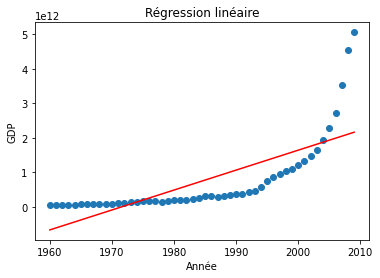

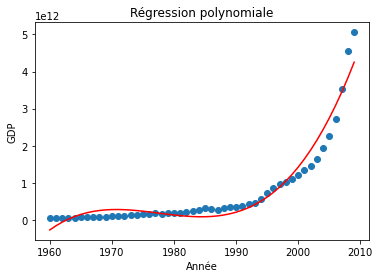

MSE pour la régression linéaire: 3.8449999173939907e+25
RMSE pour la régression linéaire: 6200806332561.912
MAE pour la régression linéaire: 6033925277544.178
MSE pour la régression polynomiale: 7.664127828046349e+24
RMSE pour la régression polynomiale: 2768416122631.558
MAE pour la régression polynomiale: 2655494514829.3325


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = np.array(df['Year']).reshape(-1, 1)
y = np.array(df['Value'])

# Diviser les données en ensemble de formation et ensemble de test
train_X = X[:len(X)-5]
train_y = y[:len(y)-5]
test_X = X[len(X)-5:]
test_y = y[len(y)-5:]

# Régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)

# Régression polynomiale
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(train_X)
poly_reg.fit(X_poly, train_y)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, train_y)

# Prédiction pour les deux modèles
pred_lin = lin_reg.predict(test_X)
pred_poly = lin_reg2.predict(poly_reg.fit_transform(test_X))

# Visualisation des résultats de la régression linéaire
plt.scatter(train_X, train_y)
plt.plot(train_X, lin_reg.predict(train_X), color='red')
plt.xlabel('Année')
plt.ylabel('GDP')
plt.title('Régression linéaire')
plt.show()

# Visualisation des résultats de la régression polynomiale
plt.scatter(train_X, train_y)
plt.plot(train_X, lin_reg2.predict(poly_reg.fit_transform(train_X)), color='red')
plt.xlabel('Année')
plt.ylabel('GDP')
plt.title('Régression polynomiale')
plt.show()

# Evaluation des deux modèles
mse_lin = mean_squared_error(test_y, pred_lin)
rmse_lin = np.sqrt(mse_lin)
mae_lin = mean_absolute_error(test_y, pred_lin)
print("MSE pour la régression linéaire:", mse_lin)
print("RMSE pour la régression linéaire:", rmse_lin)
print("MAE pour la régression linéaire:", mae_lin)

mse_poly = mean_squared_error(test_y, pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(test_y, pred_poly)
print("MSE pour la régression polynomiale:", mse_poly)
print("RMSE pour la régression polynomiale:", rmse_poly)
print("MAE pour la régression polynomiale:", mae_poly)
